In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import skimage
from PIL import Image

In [2]:
def es_correcta(imagen): return imagen[0] == 'B'

En este caso vamos a probar con un porcentaje mas alto de validación

In [3]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo3/Completo')
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.3, bs=10, seed=42,
    label_func=es_correcta
)

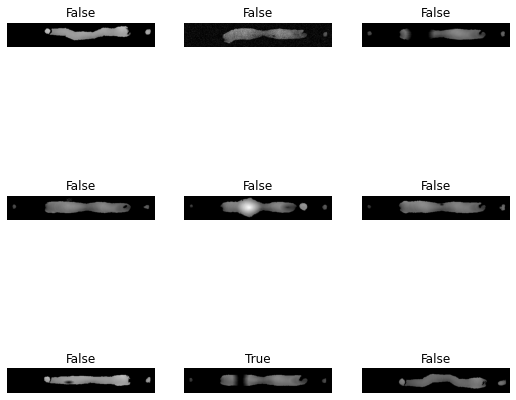

In [4]:
dls.show_batch()

In [5]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

SuggestedLRs(lr_min=0.0015848932787775993, lr_steep=4.786300905834651e-06)

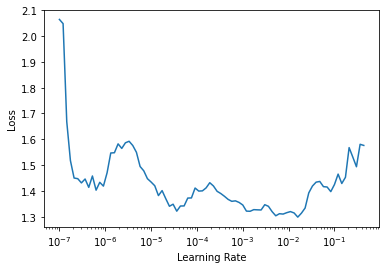

In [6]:
learn.lr_find()

In [7]:
learn.fit(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.351491,0.234757,0.916900,01:16
1,0.223696,0.134721,0.943355,01:16
2,0.172073,0.096880,0.959539,01:17
3,0.084534,0.077400,0.970121,01:17


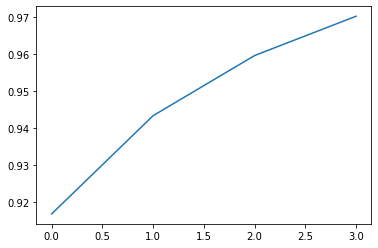

In [8]:
plt.plot(L(learn.recorder.values).itemgot(2))

En este caso hemos obtenido una curva con un crecimiento muy lento lo cual puede indicar un learning rate bajo.

In [11]:
learn.recorder.values

[(#3) [0.35149142146110535,0.23475725948810577,0.916900098323822],
 (#3) [0.22369582951068878,0.13472071290016174,0.943355143070221],
 (#3) [0.1720726042985916,0.09687972068786621,0.9595393538475037],
 (#3) [0.08453352749347687,0.07740019261837006,0.9701213836669922]]

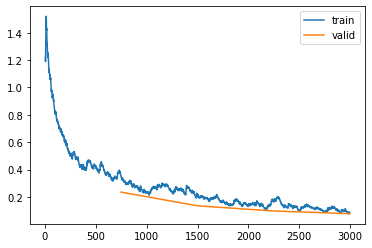

In [12]:
learn.recorder.plot_loss()

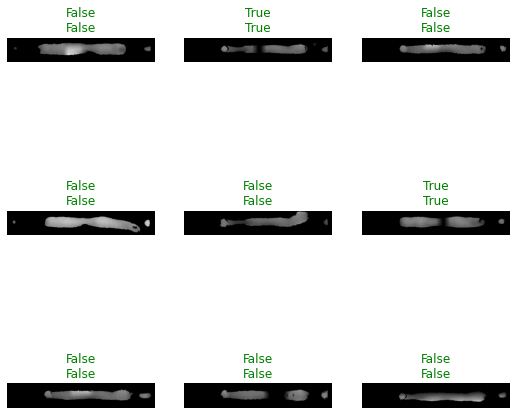

In [13]:
learn.show_results()

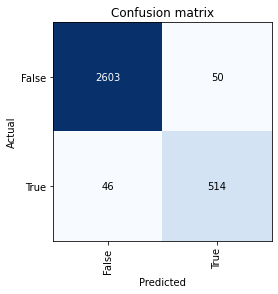

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()